# EXAMEN PRACTICO 1
#### PROBLEMA DE REGRESIÓN LINEAL

El objetivo de este proyecto es analizar los datos de un data set para un problema
de regresión y realizar una regresión lineal de los mismos.

Tener en cuenta lo siguiente:

**1.** Escoger un data set de los posibles.\
**2.** Primero realizar un análisis de las diferentes variables estimadoras para
verificar cuales son la más idóneas para el proceso de regresión.\
**3.** Escoger al menos tres variables estimadoras o todas las del data set para
generar una predicción.\
**4.** Partir el data set en dos partes, una para la obtención del modelo y otra
para la validación.\

**5.** Realizar la estimación de los parámetros de la regresión por tres métodos:

* *Usando el procesamiento matricial visto en clase - Ecuación normal.*
 
* *Usando el cálculo del gradiente descendente.*

* *Usando librerias.*
 
 
 
**6.** Calcular el error de las predicciones con el conjunto de entrenamiento y
validación.\
**7.** Calcular el coeficiente de regresión del modelo obtenido con los datos de
entrenamiento y validación.


## 1. DATASET SELECCIONADO
Auto MPG Data Set 
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## 2. DESCRIPCIÓN DEL DATASET

La finalidad de trabajar con este dataset es tratar de predecir las millas por galón (MPG) de un automóvil usando la regresión lineal múltiple. Este parametro  mide qué distancia en millas podria recorrer un automóvil con un galón de combustible.

* MPG - Millas por galón
* Cylinders: La unidad de potencia del automóvil donde la gasolina se convierte en energía.
* Displacement - Desplazamiento del motor del automóvil
* Horsepower - Tasa de rendimiento del motor
* Weight - Peso del automovil
* Acceleration: Aceleración del automóvil
* ModelYear- Modelo del automóvil
* Origin - Origen del coche
* Name - Nombre del automóvil

In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Descarga y lectura del dataset Auto MPG

In [3]:
dataframe = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']

raw_dataset = pd.read_csv(dataframe, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset2 = raw_dataset.copy()


dataset.tail(4)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#### Información del conjunto de datos

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   ModelYear     398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


#### Verificamos valores vacios en el dataset.

In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

#### Eliminamos filas donde existen valores vacios.

In [7]:
dataset = dataset.dropna(axis = 0)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

### Analisis exploratorio de datos EDA

#### Descripción dataset VER VIDEO UDEMY PARA EXPLICAR TABLA 
Con el analisis exploratorio de datos es posible ver las relaciones entre las variables, las distribuciones de las diversas características y mostrar algunas estadísticas resumidas del conjunto de datos.

In [8]:
dataset_stats = dataset.describe().transpose()
dataset_stats

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
ModelYear,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


### EXPLICAR TABLA ANTERIOR *****


In [9]:
# Distribución de las características 
# dataset.hist (figsize = (12,8), bins = 20) 
# plt.show ()

Lo que podemos concluir de los histogramas anteriores es:

* La aceleración de los autos en los datos se distribuye normalmente y la mayoría de los autos tienen una aceleración de 15$m/s2$
* La mitad del número total de automóviles (51,3%) en los datos tiene 4 cilindros.
* Nuestra salida / variable dependiente (mpg) está ligeramente sesgada hacia la derecha.
* También podemos ver que nuestras variables no están en la misma escala.

In [10]:
# sns.pairplot(dataset[column_names], height=2.5)
# plt.tight_layout()
# plt.show()

In [11]:
# cm = np.corrcoef(dataset[column_names].values.T)
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cm,
# cbar=True,
# annot=True,
# square=True,
# fmt='.2f',
# annot_kws={'size': 11},
# yticklabels=column_names,
# xticklabels=column_names)
# plt.show()

#### Otra forma de observar la correlación entre las variables 

In [12]:
correlacion = dataset.corr()
correlacion["MPG"].sort_values(ascending=False)

MPG             1.000000
ModelYear       0.580541
Origin          0.565209
Acceleration    0.423329
Cylinders      -0.777618
Horsepower     -0.778427
Displacement   -0.805127
Weight         -0.832244
Name: MPG, dtype: float64

Mirando el mapa de calor de correlación anterior, podemos concluir;\

* Existe una fuerte correlación negativa entre `Cylinders`, `Displacement`, `Horsepower` y `Weight`, lo que implica que, a medida que aumenta cualquiera de esas variables, `MPG` disminuye.
* `Cylinders`, `Displacement`, `Horsepower` y `Weight` tienen una fuerte correlación positiva entre ellos y esto viola el supuesto de no multicolinealidad de la regresión lineal. La multicolinealidad dificulta el rendimiento y la precisión de nuestro modelo de regresión. Para evitar esto, tenemos que obtener deshacerse de algunas de estas variables mediante la selección de características.

* Las otras variables, es decir, `Acceleration`, `ModelYear` y `Origen`, no están altamente correlacionadas entre sí.
* Una forma de verificar la multicolinealidad es usando el factor de inflación de la varianza `VIF`. Si una variable tiene un factor de inflación de la varianza mayor que 5, entonces se asocia con la multicolinealidad. Usaremos el factor de inflación de varianza de statsmodels para realizar esta tarea.

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y se recomienda sacarlas del modelo.

**Usando las variables `Displacement`, `Horsepower` y `Weight`**

In [13]:
lm_n = smf.ols(formula="Displacement~Horsepower+Weight", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  10.310539460377477


In [14]:
lm_n = smf.ols(formula="Horsepower~Displacement+Weight", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  5.287295179968007


In [15]:
lm_n = smf.ols(formula="Weight~Displacement+Horsepower", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  7.957383431116103


**Usando las variables `Acceleration`, `ModelYear` y `Origin`**

In [16]:
lm_n = smf.ols(formula="Acceleration~ModelYear+Origin", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  1.1204243628497677


In [17]:
lm_n = smf.ols(formula="ModelYear~Acceleration+Origin", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  1.1091375901133882


In [18]:
lm_n = smf.ols(formula="Origin~Acceleration+ModelYear", data = dataset2).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF: ", VIF)

VIF:  1.0620681382001074


## 3. VARIABLES SELECCIONADAS PARA EL MODELO 

**Modelo 1:** Existe multicolinealidad entre las variables
* Displacement
* Horsepower
* Weight


* $y$ = MPG 

**Modelo 2**
* Acceleration
* ModelYear
* Origin


* $y$ = MPG 

## 4. CALCULO DE PARAMETROS $\theta$ USANDO LA ECUACIÓN NORMAL

### Modelo 1 - *`Displacement` - `Horsepower` - `Weight`*

#### Dataset para el modelo de regresión lineal

Guardamos los valores de las variables para llenar el nuevo dataset

In [19]:
Displacement = dataset.iloc[:, 2].values
#Displacement = Displacement.reshape(392,1)
# print(Displacement.shape)

Horsepower = dataset.iloc[:, 3].values
#Horsepower = Horsepower.reshape(392,1)
# print(Horsepower.shape)

Weight = dataset.iloc[:, 4].values
#Weight = Weight.reshape(392,1)
# print(Weight.shape)

MPG = dataset.iloc[:, 0].values
#MPG = MPG.reshape(392,1)
# print(MPG.shape)

Creamos el nuevo dataset, donde las columnas son Displacement, Horsepower y Weight.\
La ultima columna es la salida MPG


In [20]:
Mdataset = np.zeros((392,4))
Mdataset[:, 0] = Displacement
Mdataset[:, 1] = Horsepower
Mdataset[:, 2] = Weight
Mdataset[:, 3] = MPG
# print(Mdataset[:5,:])

#### Datos de entrenamiento y validación

*Entrenamiento (80%) - 313 filas, 3 columnas*


In [21]:
x_train = Mdataset[0:313, 0:3]
# print(x_train[0:5, :])
x_train.shape

y_train = Mdataset[0:313,3]
y_train = y_train.reshape(313,1)
# print(y_train[0:5,:])
# y_train.shape

*Validación (20%) - 79 filas, 1 columna*

In [22]:
x_test = Mdataset[313:, 0:3]
# print(x_test[0:5, :])

y_test = Mdataset[313:,3]
y_test = y_test.reshape(79,1)
# print(y_test[0:5,:])

Calculamos el valor del parametro $\hat{\theta}$


$\hat{\theta} = (X^TX)^{-1}X^TY$

In [23]:
# Matriz X
x = np.ones((313,4))
x[:,1:] = x_train
# print(x[0:5, :])

In [24]:
# matriz y
y = y_train
# producto dentro del parentesis
x_prod = np.dot(np.transpose(x),x)
# x inversa
x_inv = np.linalg.inv(x_prod)

Producto matricial: $(X^TX)^{-1}X^T$

In [25]:
x_comp = np.dot(x_inv,np.transpose(x))

Calculo de los parametros $\theta$

In [26]:
theta = np.dot(x_comp, y)
print(theta)

[[ 4.07464239e+01]
 [-5.60027094e-03]
 [-2.21589474e-02]
 [-5.08722815e-03]]


#### Modelo de regresión lineal

$\hat{y} = 40.7464 - 0.0056x_1 - 0.022158x_2 - 0.005087x_3$

In [2]:
##naranja test 
##azul train

x_var = np.linspace(1,500,20)
y_reg = 40.7464 - 0.0056*x_var  - 0.022158*x_var - 0.005087*x_var 
plt.scatter(x_test[:,0] ,y_test, color="blue")
plt.scatter(x_train[:,0] ,y_train, color="orange")
plt.plot(x_var, y_reg, 'g-')
plt.grid()
plt.show()

NameError: name 'np' is not defined

#### Error para datos de entrenamiento

In [28]:
y_hat_train1 = 40.7464  - 0.0056 * x_train[:,0] - 0.022158 * x_train[:,1] - 0.005087* x_train[:,2]
y_hat_train1 = y_hat_train1.reshape(313,1)


# MSE
sum = 0
for i in range(313):
    sum = sum + (y_train[i, :] - y_hat_train1[i, :]) ** 2

mse_train1 = sum / 313

print("MSE entrenamiento: ",mse_train1)


MSE entrenamiento:  [10.67078875]


#### Error para datos de validación

In [29]:
y_hat_test1 = 40.7464  - 0.0056 * x_test[:,0] - 0.022158 * x_test[:,1] - 0.005087* x_test[:,2]
y_hat_test1 = y_hat_test1.reshape(79,1)


# MSE
sum = 0
for i in range(79):
    sum = sum + (y_test[i, :] - y_hat_test1[i, :]) ** 2

mse_test1 = sum / 79

print("MSE validación: ",mse_test1)


MSE validación:  [58.47415317]


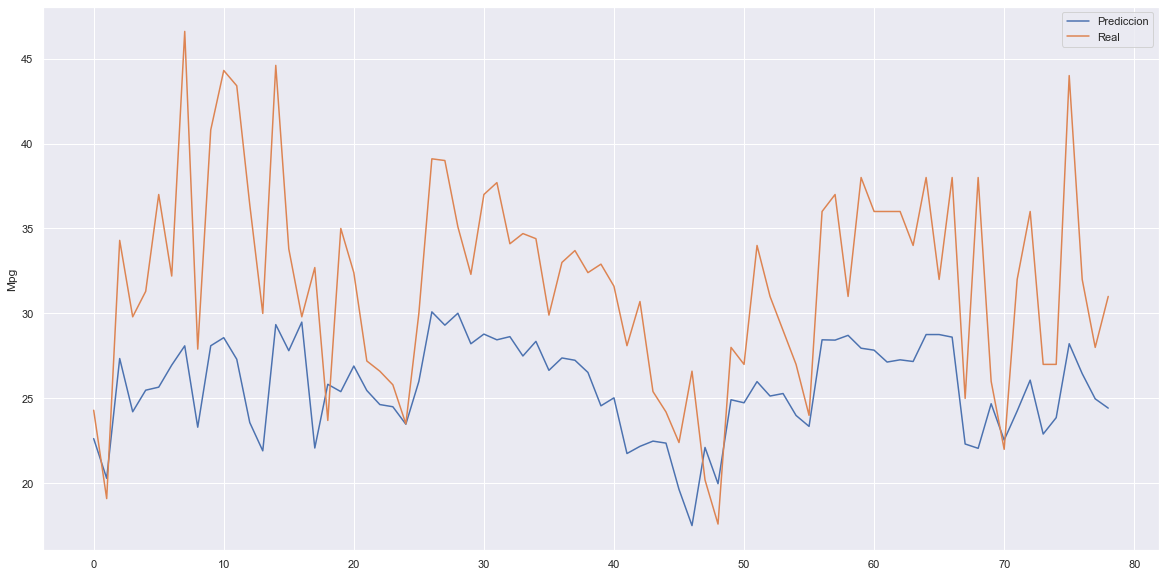

In [30]:
plt.figure(figsize = (20,10))

plt.plot(y_hat_test1, label='Prediccion')
plt.plot(y_test, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

#### Coeficiente de regresión para datos de entrenamiento

In [31]:
slr = LinearRegression()
slr.fit(y_train, y_hat_train1)
print('Coeficiente: %.3f' % slr.coef_)
print('Intercepto: %.3f' % slr.intercept_)

Coeficiente: 0.761
Intercepto: 5.089


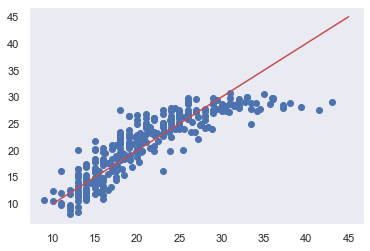

In [32]:
x_var2 = np.linspace(10,45,10)
y_var2 = x_var2
plt.scatter(y_train, y_hat_train1)
plt.plot(x_var2,y_var2, 'r-')
plt.grid()
plt.show()

#### Coeficiente de regresión para datos de validación

In [33]:
slr = LinearRegression()
slr.fit(y_test, y_hat_test1)
print('Coeficiente: %.3f' % slr.coef_)
print('Intercepto: %.3f' % slr.intercept_)

Coeficiente: 0.326
Intercepto: 15.241


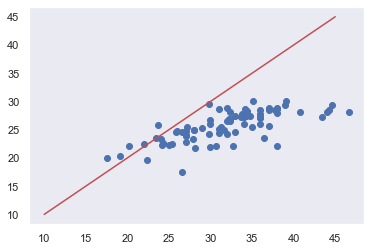

In [34]:
x_var3 = np.linspace(10,45,10)
y_var3 = x_var3
plt.scatter(y_test, y_hat_test1)
plt.plot(x_var3,y_var3, 'r-')
plt.grid()
plt.show()

#### Calculo del modelo usando libreria Scikit-Learn

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Coeficientes: ',lr.coef_)
print('Intercepto: ', lr.intercept_)

Coeficientes:  [[-0.00560027 -0.02215895 -0.00508723]]
Intercepto:  [40.74642389]


$\hat{y} = 40.7464 - 0.0056x_1 - 0.022158x_2 - 0.005087x_3$

### Modelo 1. Usando ecuación normal y datos normalizados

In [36]:
def norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']
norm_dataset = norm(dataset)


In [37]:
norm_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726


#### Dataset para el modelo de regresión lineal


In [38]:
Displacementn = norm_dataset.iloc[:, 2].values
#Displacement = Displacement.reshape(392,1)
# print(Displacementn.shape)

Horsepowern = norm_dataset.iloc[:, 3].values
#Horsepower = Horsepower.reshape(392,1)
# print(Horsepowern.shape)

Weightn = norm_dataset.iloc[:, 4].values
#Weight = Weight.reshape(392,1)
# print(Weightn.shape)

MPGn = norm_dataset.iloc[:, 0].values
#MPG = MPG.reshape(392,1)
# print(MPGn.shape)

In [39]:
M_normdataset = np.zeros((392,4))
M_normdataset[:, 0] = Displacementn
M_normdataset[:, 1] = Horsepowern
M_normdataset[:, 2] = Weightn
M_normdataset[:, 3] = MPGn
# print(M_normdataset[:5,:])

#### Datos de entrenamiento y validación

*Entrenamiento (80%) - 313 filas, 3 columnas*


In [40]:
xn_train = M_normdataset[0:313, 0:3]
# print(xn_train[0:5, :])
xn_train.shape

yn_train = M_normdataset[0:313,3]
yn_train = yn_train.reshape(313,1)
# print(yn_train[0:5,:])
# yn_train.shape

*Validación (20%) - 79 filas, 1 columna*

In [41]:
xn_test = M_normdataset[313:, 0:3]
# print(xn_test[0:5, :])

yn_test = M_normdataset[313:,3]
yn_test = yn_test.reshape(79,1)
# print(yn_test[0:5,:])

Calculamos el valor del parametro $\hat{\theta}$


$\hat{\theta} = (X^TX)^{-1}X^TY$

In [42]:
# Matriz Xn
xn = np.ones((313,4))
xn[:,1:] = xn_train
# print(xn[0:5, :])

# Matriz yn
yn = yn_train

# producto dentro del parentesis
xn_prod = np.dot(np.transpose(xn),xn)

# x inversa
xn_inv = np.linalg.inv(xn_prod)

xn_comp = np.dot(xn_inv,np.transpose(xn))

thetan = np.dot(xn_comp, yn)
print(thetan)

[[-0.16026071]
 [-0.07508446]
 [-0.10927902]
 [-0.55363235]]


#### Modelo de regresión lineal con datos normalizados

$\hat{y} = -0.05874 + 0.08716x_1 - 1.0164x_2 - 0.3964x_3$

$\hat{y} = -0.16026071 -0.07508446x_1 - 0.10927902x_2 -0.55363235x_3$


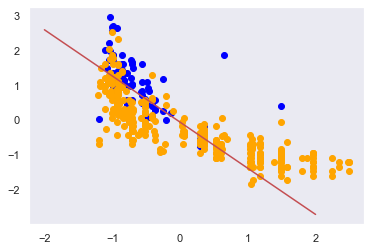

In [43]:
##naranja train azul test

xn_var = np.linspace(-2,2,100)
yn_reg = -0.05874 + 0.08716*xn_var - 1.0164*xn_var - 0.3964*xn_var
plt.scatter(xn_test[:,0] ,yn_test, color='blue')
plt.scatter(xn_train[:,0] ,yn_train, color= 'orange')
plt.plot(xn_var, yn_reg, 'r-')
plt.grid()
plt.show()

#### Error para datos de entrenamiento datos normalizados

In [44]:
yn_hat_train1 = -0.05874  + 0.08716* xn_train[:,0] - 1.0164* xn_train[:,1] - 0.3964* xn_train[:,2]
yn_hat_train1 = yn_hat_train1.reshape(313,1)


# MSE
sum = 0
for i in range(313):
    sum = sum + (yn_train[i, :] - yn_hat_train1[i, :]) ** 2

msen_train1 = sum / 313

print("MSE entrenamiento: ",msen_train1)

MSE entrenamiento:  [0.62010897]


#### Error para datos de validación datos normalizados

In [45]:
yn_hat_test1 = -0.05874  + 0.08716* xn_test[:,0] - 1.0164* xn_test[:,1] - 0.3964* xn_test[:,2]
yn_hat_test1 = yn_hat_test1.reshape(79,1)


# MSE
sum = 0
for i in range(79):
    sum = sum + (yn_test[i, :] - yn_hat_test1[i, :]) ** 2

msen_test1 = sum / 79

print("MSE validación: ",msen_test1)


MSE validación:  [0.37721628]


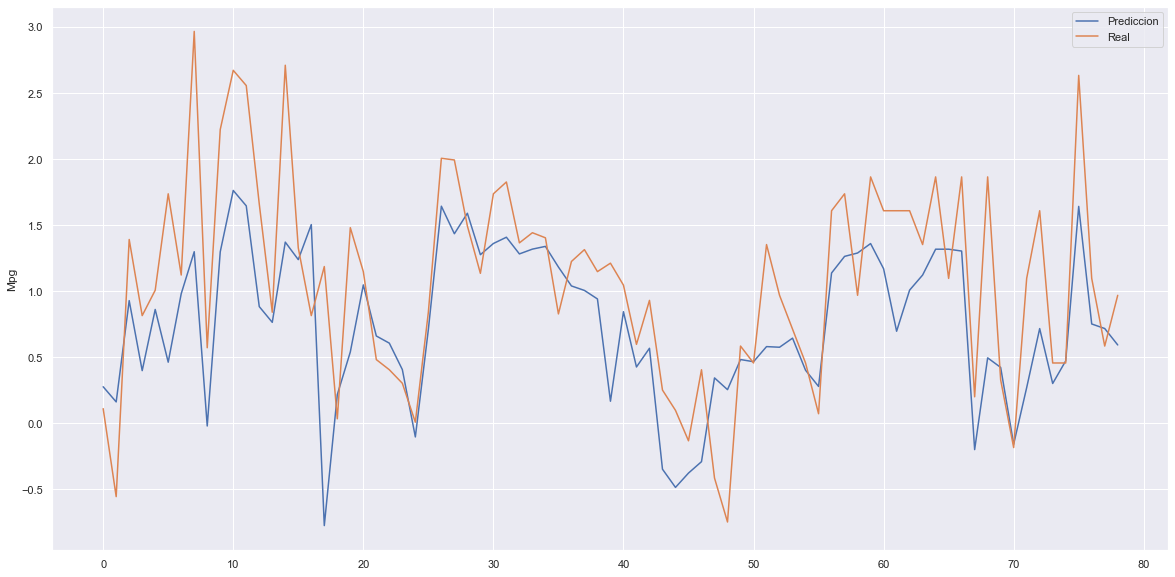

In [46]:
plt.figure(figsize = (20,10))

plt.plot(yn_hat_test1, label='Prediccion')
plt.plot(yn_test, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

#### Coeficientes de regresión para datos de entrenamiento normalizados

In [49]:
slr = LinearRegression()
slr.fit(yn_train, yn_hat_train1)
print('Coeficiente: %.3f' % slr.coef_)
print('Intercepto: %.3f' % slr.intercept_)

Coeficiente: 1.302
Intercepto: 0.090


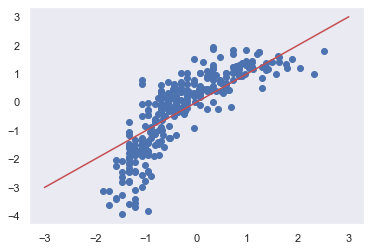

In [51]:
x_var = np.linspace(-3,3,10)
y_var = x_var
plt.scatter(yn_train, yn_hat_train1)
plt.plot(x_var,y_var, 'r-')
plt.grid()
plt.show()

#### Coeficientes de regresión para datos normalizados de validación

In [53]:
slr = LinearRegression()
slr.fit(yn_test, yn_hat_test1)
print('Coeficiente: %.3f' % slr.coef_)
print('Intercepto: %.3f' % slr.intercept_)

Coeficiente: 0.540
Intercepto: 0.172


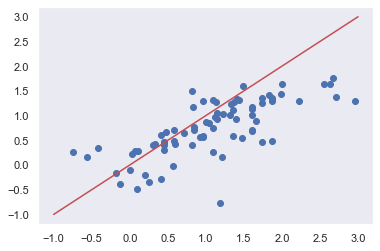

In [55]:
x_var4 = np.linspace(-1,3,10)
y_var4 = x_var4
plt.scatter(yn_test, yn_hat_test1)
plt.plot(x_var4,y_var4, 'r-')
plt.grid()
plt.show()

#### Usando libreria Scikit-Learn

In [56]:
lr = LinearRegression()
lr.fit(xn_train,yn_train)
print('Coeficientes: ',lr.coef_)
print('Intercepto: ', lr.intercept_)

Coeficientes:  [[-0.07508446 -0.10927902 -0.55363235]]
Intercepto:  [-0.16026071]


$\hat{y} = -0.05874 + 0.08716x_1 - 1.0164x_2 - 0.3964x_3$

$\hat{y} = -0.16026071 -0.07508446x_1 - 0.10927902x_2 -0.55363235x_3$


### Modelo 2 - *`Acceleration` - `ModelYear` - `Origin`*

#### Dataset para el modelo de regresión lineal


In [57]:
Acceleration = dataset.iloc[:, 5].values
#Displacement = Displacement.reshape(392,1)
# print(Acceleration.shape)

ModelYear = dataset.iloc[:, 6].values
#Horsepower = Horsepower.reshape(392,1)
# print(ModelYear.shape)

Origin = dataset.iloc[:, 7].values
#Weight = Weight.reshape(392,1)
# print(Origin.shape)

MPG2 = dataset.iloc[:, 0].values
#MPG = MPG.reshape(392,1)
# print(MPG2.shape)

In [1]:
Mdataset2 = np.zeros((392,4))
Mdataset2[:, 0] = Acceleration
Mdataset2[:, 1] = ModelYear
Mdataset2[:, 2] = Origin
Mdataset2[:, 3] = MPG2
print(Mdataset2[:5,:])

NameError: name 'np' is not defined

#### Datos de entrenamiento y validación

*Entrenamiento (80%) - 313 filas, 3 columnas*


In [60]:
x_train2 = Mdataset2[0:313, 0:3]
# print(x_train2[0:5, :])
# x_train2.shape

y_train2 = Mdataset2[0:313,3]
y_train2 = y_train2.reshape(313,1)
# print(y_train2[0:5,:])
# y_train2.shape

*Validación (20%) - 79 filas, 1 columna*

In [61]:
x_test2 = Mdataset2[313:, 0:3]
# print(x_test2[0:5, :])

y_test2 = Mdataset2[313:,3]
y_test2 = y_test2.reshape(79,1)
# print(y_test2[0:5,:])

Calculamos el valor del parametro $\hat{\theta}$


$\hat{\theta} = (X^TX)^{-1}X^TY$

In [77]:
# Matriz X
x2 = np.ones((313,4))
x2[:,1:] = x_train2

# Matriz y
y2 = y_train2

# producto dentro del parentesis
x2_prod = np.dot(np.transpose(x2),x2)

# x inversa
x2_inv = np.linalg.inv(x2_prod)

x2_comp = np.dot(x2_inv,np.transpose(x2))

theta2 = np.dot(x2_comp, y2)
print(theta2)

[[-44.82941959]
 [  0.54792675]
 [  0.68574093]
 [  4.44638047]]


#### Modelo de regresión lineal

$\hat{y} = -44.829 + 0.5479x_1 + 0.6857x_2 + 4.4463x_3$

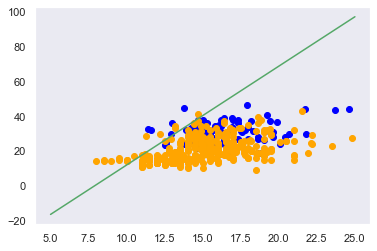

In [63]:
##azul train  naranja test

x_var5 = np.linspace(5,25,20)
y_reg5 = -44.829+ 0.5479*x_var5+ 0.6857*x_var5 + 4.4463*x_var5
plt.scatter(x_test2[:,0] ,y_test2, color="blue")
plt.scatter(x_train2[:,0] ,y_train2, color="orange")
plt.plot(x_var5, y_reg5, 'g-')
plt.grid()
plt.show()

In [64]:
y_hat_train2 = -44.829  + 0.5479* x_train2[:,0] +0.6857* x_train2[:,1] + 4.4463* x_train2[:,2]
y_hat_train2 = y_hat_train2.reshape(313,1)


# MSE
sum = 0
for i in range(313):
    sum = sum + (y_train2[i, :] - y_hat_train2[i, :]) ** 2

mse_train2 = sum / 313

print("MSE entrenamiento: ",mse_train2)


MSE entrenamiento:  [23.01928496]


In [65]:
y_hat_test2 = -44.829  + 0.5479* x_test2[:,0] +0.6857* x_test2[:,1] + 4.4463* x_test2[:,2]
y_hat_test2 = y_hat_test2.reshape(79,1)


# MSE
sum = 0
for i in range(79):
    sum = sum + (y_test2[i, :] - y_hat_test2[i, :]) ** 2

mse_test2 = sum / 79

print("MSE validación: ",mse_test2)


MSE validación:  [38.27934171]


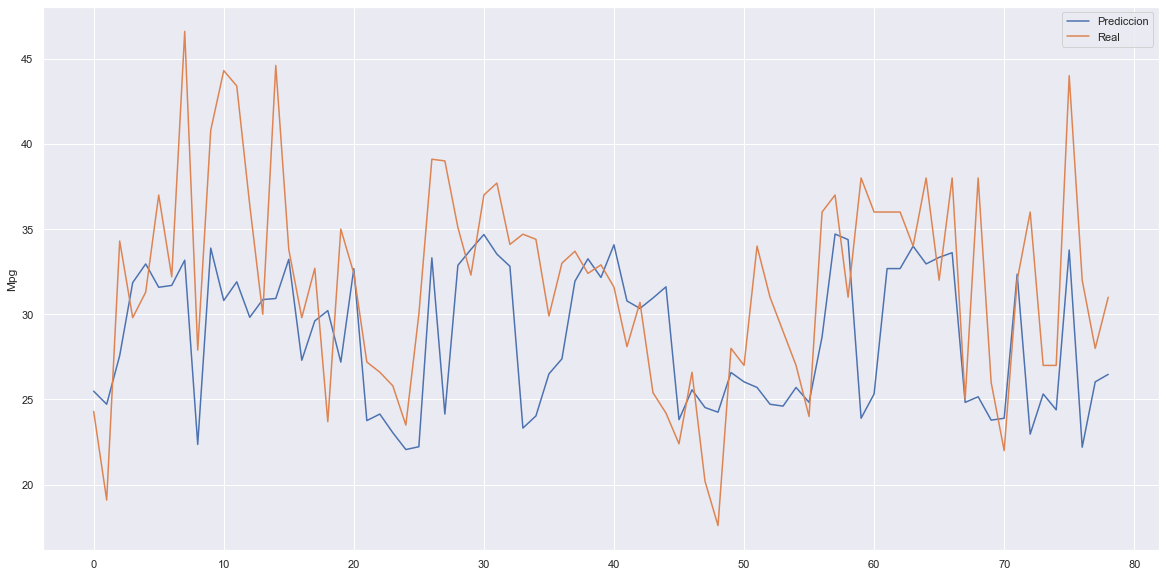

In [66]:
plt.figure(figsize = (20,10))

plt.plot(y_hat_test2, label='Prediccion')
plt.plot(y_test2, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

### Modelo 2. Usando ecuación normal y datos normalizados

#### Dataset para el modelo de regresión lineal


In [67]:
Accelerationn = norm_dataset.iloc[:, 5].values
#Displacement = Displacement.reshape(392,1)
# print(Accelerationn.shape)

ModelYearn = norm_dataset.iloc[:, 6].values
#Horsepower = Horsepower.reshape(392,1)
# print(ModelYearn.shape)

Originn = norm_dataset.iloc[:, 7].values
#Weight = Weight.reshape(392,1)
# print(Originn.shape)

MPG2n = norm_dataset.iloc[:, 0].values
#MPG = MPG.reshape(392,1)
# print(MPG2n.shape)

In [69]:
M_normdataset2 = np.zeros((392,4))
M_normdataset2[:, 0] = Accelerationn
M_normdataset2[:, 1] = ModelYearn
M_normdataset2[:, 2] = Originn
M_normdataset2[:, 3] = MPG2n
# print(M_normdataset2[:5,:])

#### Datos de entrenamiento y validación

*Entrenamiento (80%) - 313 filas, 3 columnas*


In [83]:
xn_train2 = M_normdataset2[0:313, 0:3]

yn_train2 = M_normdataset2[0:313,3]
yn_train2 = yn_train2.reshape(313,1)


*Validación (20%) - 79 filas, 1 columna*

In [103]:
xn_test2 = M_normdataset2[313:, 0:3]

yn_test2 = M_normdataset2[313:,3]
yn_test2 = yn_test2.reshape(79,1)

Calculamos el valor del parametro $\hat{\theta}$


$\hat{\theta} = (X^TX)^{-1}X^TY$

In [104]:
# Matriz Xn
xn2 = np.ones((313,4))
xn2[:,1:] = xn_train2
# print(xn[0:5, :])

# Matriz yn
yn2 = yn_train2

# producto dentro del parentesis
xn2_prod = np.dot(np.transpose(xn2),xn2)

# x inversa
xn2_inv = np.linalg.inv(xn2_prod)

xn2_comp = np.dot(xn2_inv,np.transpose(xn2))

thetan2 = np.dot(xn2_comp, yn2)
print(thetan2)

[[-0.08297989]
 [ 0.19367764]
 [ 0.32364977]
 [ 0.45889006]]


$\hat{y} = -0.16026071-0.07508446x_1 -0.10927902x_2 -0.55363235x_3$


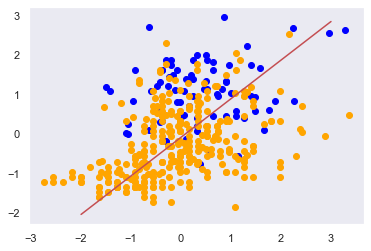

In [105]:
##naranja train azul test

xn_var2 = np.linspace(-2,3,100)
yn_reg2 = -0.08297989 +0.19367764*xn_var2 +0.32364977*xn_var2 +0.45889006*xn_var2
plt.scatter(xn_test2[:,0] ,yn_test2, color='blue')
plt.scatter(xn_train2[:,0] ,yn_train2, color= 'orange')
plt.plot(xn_var2, yn_reg2, 'r-')
plt.grid()
plt.show()

#### Error modelo 2 para datos de entrenamiento datos normalizados

In [106]:
yn_hat_train2 = -0.08297989 + 0.19367764*xn_train2[:,0] + 0.32364977*xn_train2[:,1] + 0.45889006* xn_train2[:,2]
yn_hat_train2 = yn_hat_train2.reshape(313,1)


# MSE
sum = 0
for i in range(313):
    sum = sum + (yn_train2[i, :] - yn_hat_train2[i, :]) ** 2

msen_train2 = sum / 313

print("MSE entrenamiento: ",msen_train2)

MSE entrenamiento:  [0.37787224]


#### Error modelo 2 para datos de validación datos normalizados

In [107]:
yn_hat_test2 = -0.08297989 + 0.19367764*xn_test2[:,0] + 0.32364977*xn_test2[:,1] + 0.45889006*xn_test2[:,2]
yn_hat_test2 = yn_hat_test2.reshape(79,1)


# MSE
sum = 0
for i in range(79):
    sum = sum + (yn_test2[i, :] - yn_hat_test2[i, :]) ** 2

msen_test2 = sum / 79

print("MSE validación: ",msen_test2)

MSE validación:  [0.62800563]


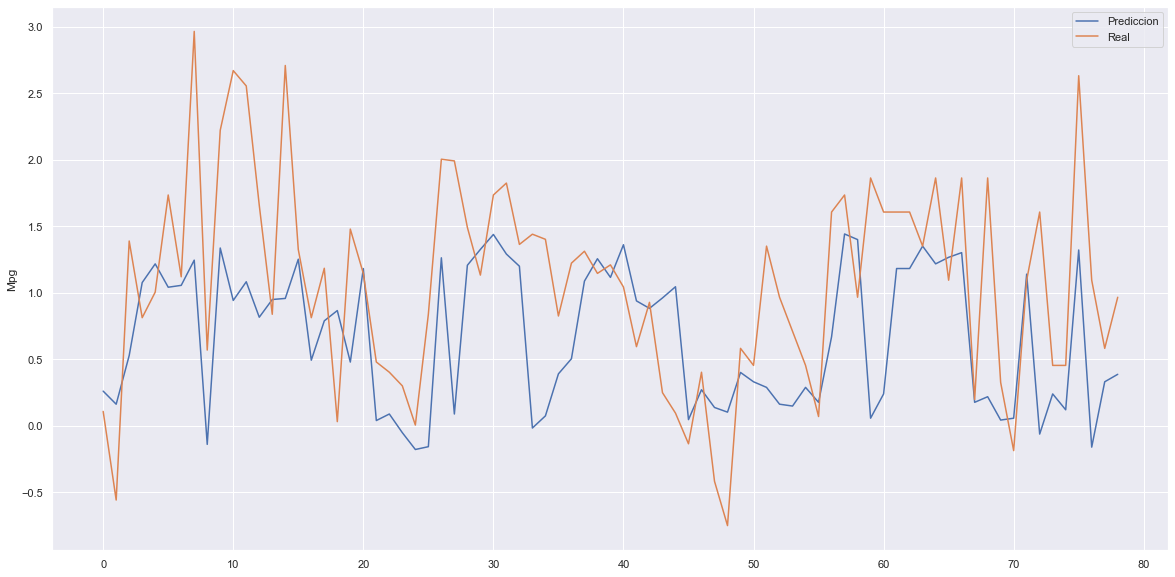

In [108]:
plt.figure(figsize = (20,10))

plt.plot(yn_hat_test2, label='Prediccion')
plt.plot(yn_test2, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

## Hacer regresion con stats model
## ver udemy errores
## tabla errores modelos

In [ ]:
norm